Class names: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


/var/folders/26/lffvgsr52h1bp9_zx1pj1pjc0000gn/T/ipykernel_66026/2069836177.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[class_names[k] for k in class_counts.keys()],


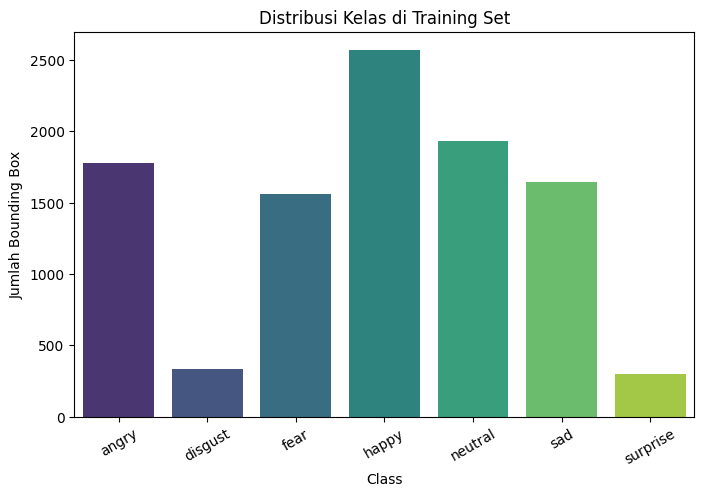

In [4]:
%matplotlib inline

import os
import glob
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random

# ================
# 1. Load data.yaml
# ================
data_yaml = "../data/data.yaml"  # ganti sesuai path
with open(data_yaml, "r") as f:
    data_cfg = yaml.safe_load(f)

class_names = data_cfg["names"]
num_classes = len(class_names)
print("Class names:", class_names)

# =================
# 2. Hitung distribusi data
# =================
train_labels = glob.glob("../data/train/labels/*.txt")

class_counts = {i: 0 for i in range(num_classes)}
for label_file in train_labels:
    with open(label_file, "r") as f:
        for line in f.readlines():
            cls_id = int(line.strip().split()[0])
            class_counts[cls_id] += 1

# Plot distribusi
plt.figure(figsize=(8,5))
sns.barplot(x=[class_names[k] for k in class_counts.keys()], 
            y=list(class_counts.values()), palette="viridis")
plt.title("Distribusi Kelas di Training Set")
plt.xlabel("Class")
plt.ylabel("Jumlah Bounding Box")
plt.xticks(rotation=30)
plt.show()


In [2]:
import os
from glob import glob

# Path to your dataset
dataset_path = "../data"

splits = ["train", "valid", "test"]
extensions = ("*.jpg", "*.jpeg", "*.png")  # adjust if needed

for split in splits:
    img_dir = os.path.join(dataset_path, split, "images")
    label_dir = os.path.join(dataset_path, split, "labels")

    images = []
    for ext in extensions:
        images.extend(glob(os.path.join(img_dir, ext)))
    labels = glob(os.path.join(label_dir, "*.txt"))

    print(f"{split.upper()}: {len(images)} images, {len(labels)} labels")


TRAIN: 2510 images, 2510 labels
VALID: 245 images, 245 labels
TEST: 180 images, 180 labels


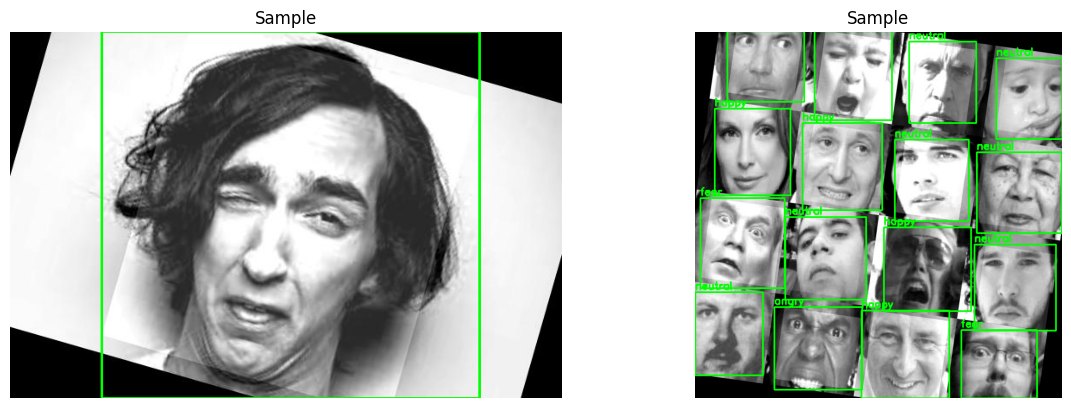

In [5]:
%matplotlib inline

# =================
# 3. Visualisasi contoh gambar
# =================
def plot_random_images(img_dir, label_dir, n=4):
    img_files = glob.glob(os.path.join(img_dir, "*.jpg")) + glob.glob(os.path.join(img_dir, "*.png"))
    
    if len(img_files) == 0:
        print("⚠️ Tidak ada gambar di folder:", img_dir)
        return
    
    # Biar tidak error kalau n > jumlah gambar
    n = min(n, len(img_files))
    sample_imgs = random.sample(img_files, n)

    plt.figure(figsize=(12, 8))
    for i, img_path in enumerate(sample_imgs, 1):
        img = cv2.imread(img_path)
        h, w, _ = img.shape
        label_path = os.path.join(
            label_dir, 
            os.path.basename(img_path).replace(".jpg", ".txt").replace(".png", ".txt")
        )

        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f.readlines():
                    cls, x, y, bw, bh = map(float, line.strip().split())
                    cls = int(cls)
                    # convert xywh (normalized) -> pixel
                    x1 = int((x - bw/2) * w)
                    y1 = int((y - bh/2) * h)
                    x2 = int((x + bw/2) * w)
                    y2 = int((y + bh/2) * h)
                    color = (0, 255, 0)
                    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                    cv2.putText(img, class_names[cls], (x1, y1-5),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 2, i)
        plt.imshow(img)
        plt.axis("off")
        plt.title("Sample")

    plt.tight_layout()
    plt.show()

# contoh 4 random gambar dari train set
plot_random_images(
    "../data/train/images", 
    "../data/train/labels", 
    n=2
)


In [1]:
import os
from glob import glob

# Path to your dataset
dataset_path = "../data2"

splits = ["train", "valid", "test"]
extensions = ("*.jpg", "*.jpeg", "*.png")  # adjust if needed

for split in splits:
    img_dir = os.path.join(dataset_path, split, "images")
    label_dir = os.path.join(dataset_path, split, "labels")

    images = []
    for ext in extensions:
        images.extend(glob(os.path.join(img_dir, ext)))
    labels = glob(os.path.join(label_dir, "*.txt"))

    print(f"{split.upper()}: {len(images)} images, {len(labels)} labels")

TRAIN: 6586 images, 6586 labels
VALID: 1873 images, 1873 labels
TEST: 941 images, 941 labels
